正在设置中文字体...
Selecting previously unselected package fonts-wqy-microhei.
(Reading database ... 117528 files and directories currently installed.)
Preparing to unpack .../fonts-wqy-microhei_0.2.0-beta-3.1_all.deb ...
Unpacking fonts-wqy-microhei (0.2.0-beta-3.1) ...
Setting up fonts-wqy-microhei (0.2.0-beta-3.1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
Selecting previously unselected package fonts-wqy-zenhei.
(Reading database ... 117537 files and directories currently installed.)
Preparing to unpack .../fonts-wqy-zenhei_0.9.45-8_all.deb ...
Unpacking fonts-wqy-zenhei (0.9.45-8) ...
Setting up fonts-wqy-zenhei (0.9.45-8) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
安装可视化库...
中文字体设置完成！
✅ 环境设置完成
✅ 文件加载成功，编码：gbk
📊 文本长度：507787 字符
⚠️ 未找到停用词文件，使用基础停用词表
🧹 正在清理文本...
📊 清理后文本长度：453489 字符

任务A：空间转移的'决策'证据提取
🔍 找到包含区位关键词的句子 73 条
🏮 老城区/码头区相关：43 条
🚂 火车站/租界区相关：23 条
❓ 模糊/混合区域：7 条
💾 已保存到 old_center_contexts.txt
💾 已保存到 new_center_contexts.txt

📈 区位关键词出现频次统计：
      出现

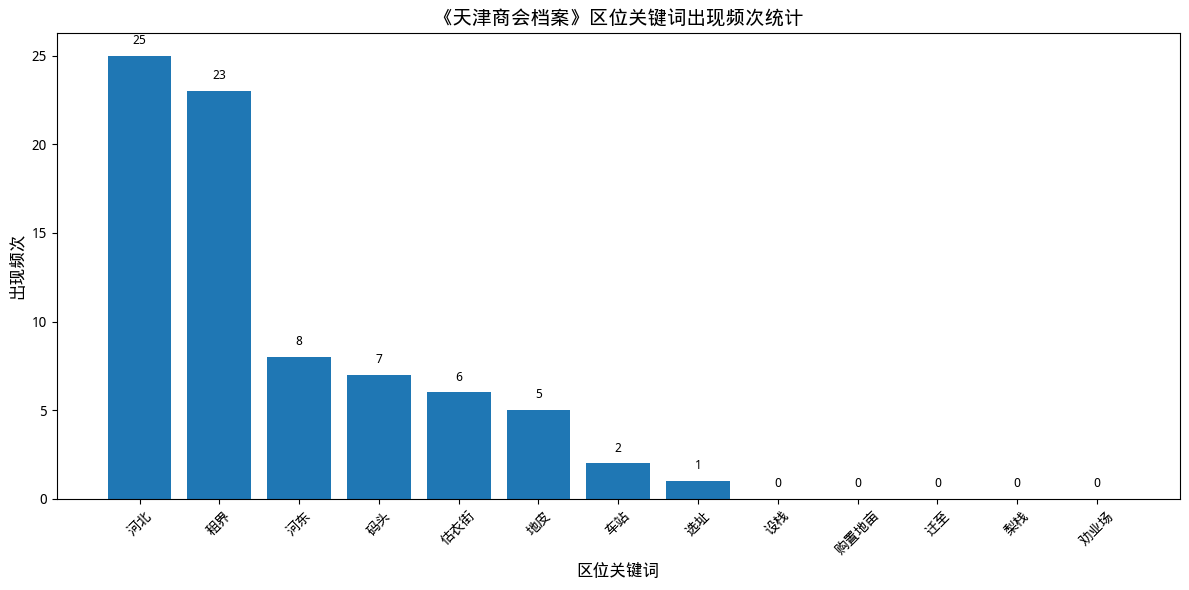


任务B：经济理性驱动的'成本-收益'分析

💰 经济关键词出现频次对比：
    全文出现频次  新中心段落出现频次  新中心相对密度
运费       0          0      0.0
水脚       0          0      0.0
脚力       0          0      0.0
成本       0          0      0.0
租金       0          0      0.0
地价       0          0      0.0
开支       0          0      0.0
便利       0          0      0.0
迅捷       0          0      0.0
利权       0          0      0.0
生意       0          0      0.0
销路       1          0      0.0
客源       0          0      0.0
获利       0          0      0.0
繁盛       0          0      0.0


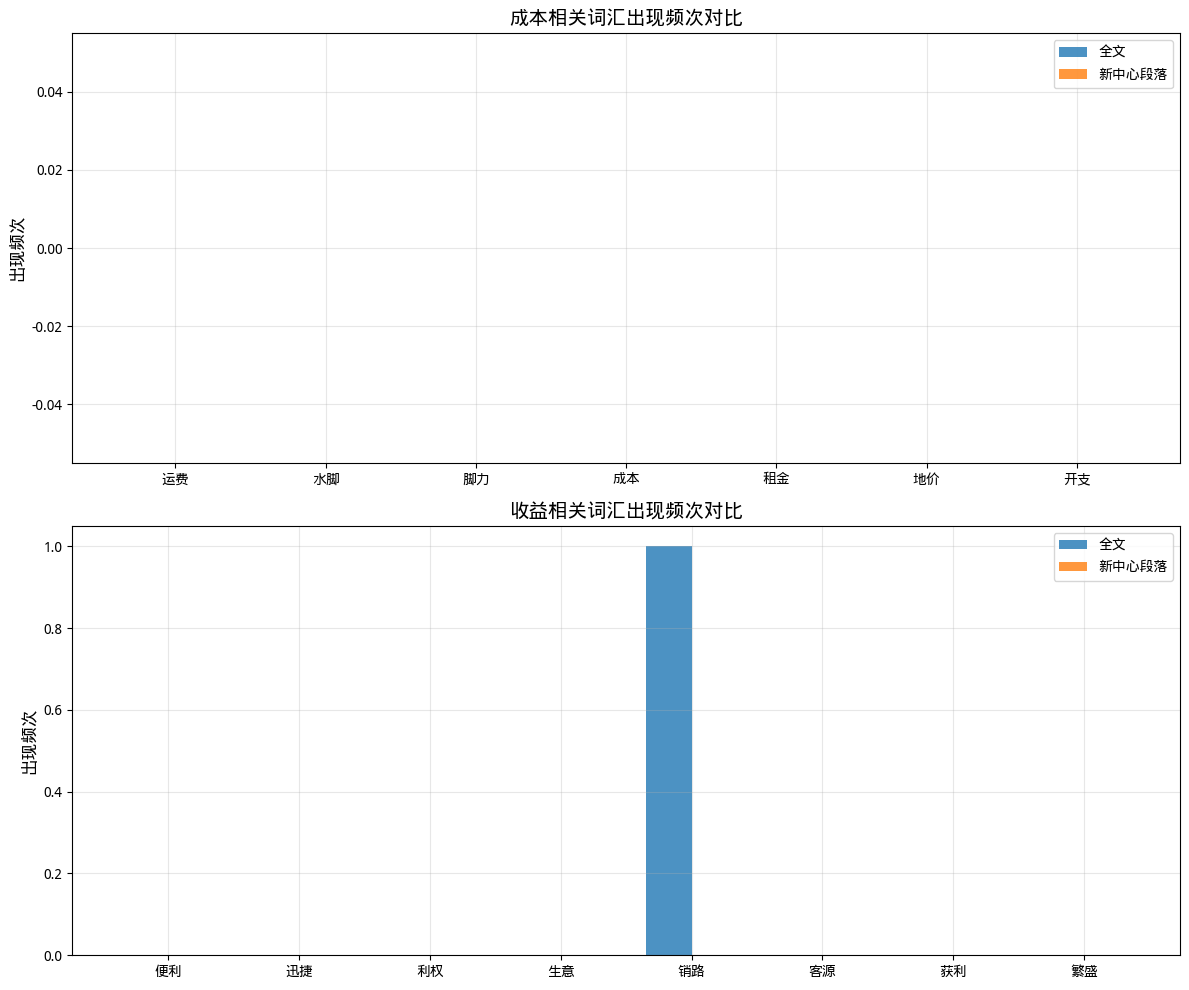


🔗 开始共现网络分析...

📊 共发现 1 条共现关系
前10条重要的共现关系：
  来源词 目标词  共现频次
0  租界  繁盛     1
💾 共现关系已保存到 cooccurrence_edges.csv


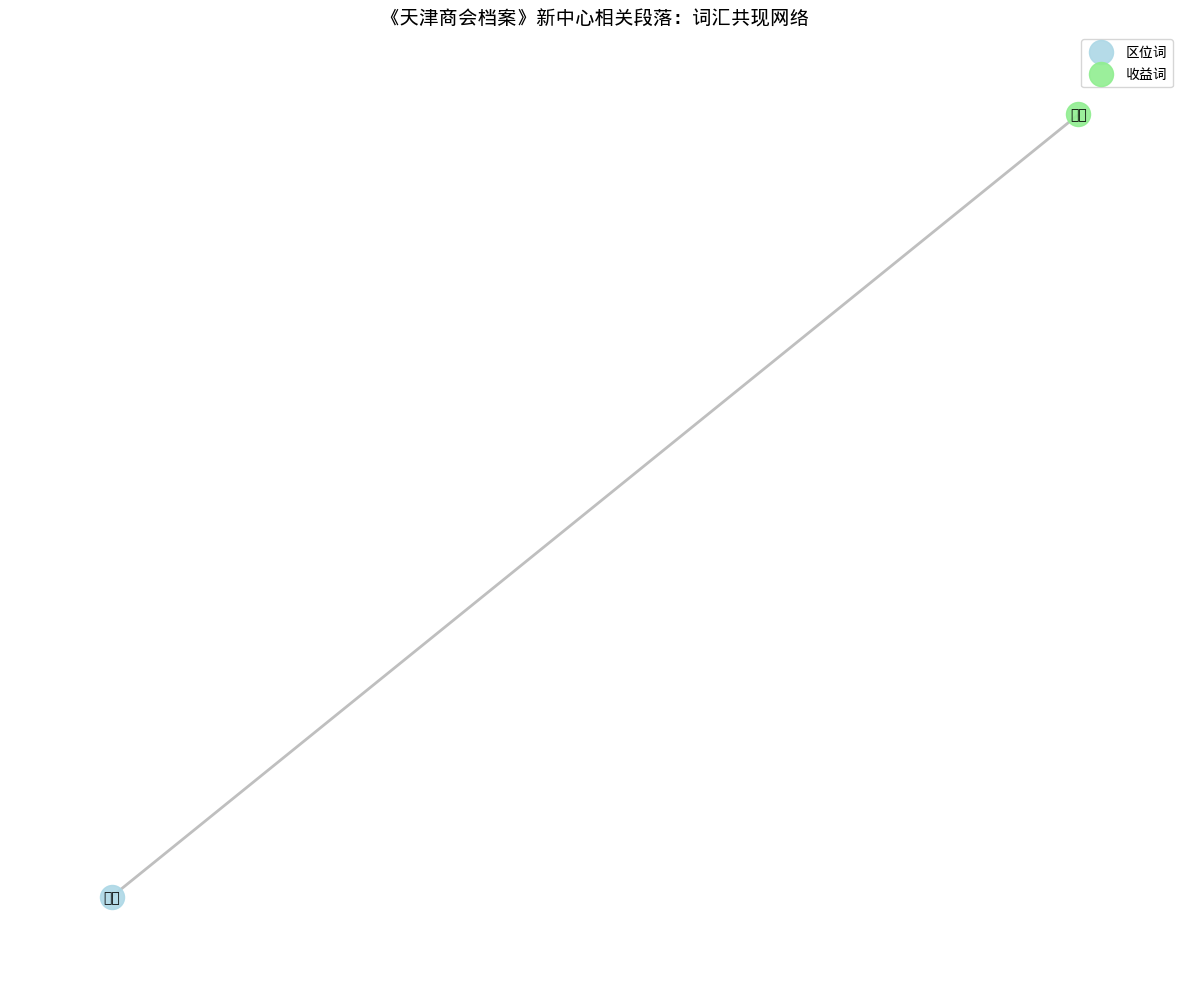

📊 共现网络图已生成，包含 2 个节点和 1 条边

任务C：制度调适过程的'规则'证据提取
⚖️ 找到包含制度关键词的句子 736 条
🏛️ 找到'新空间+新规则'的关键证据 3 条
💾 已保存到 institution_contexts.txt
💾 已保存到 institution_adjustment_contexts.txt


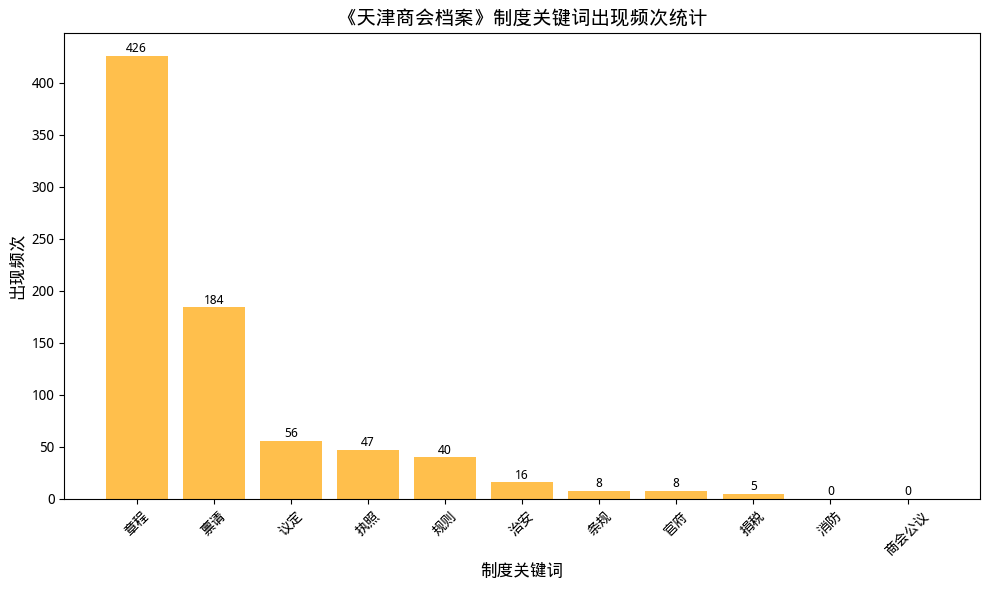


📊 综合分析报告摘要

🔍 空间转移证据分析：
   - 共发现区位相关讨论段落：73 处
   - 其中明确讨论新中心（车站/租界区）：23 处
   - 新中心讨论占比：31.5%
   - 最常讨论的区位词：河北 (25次)

💰 经济理性驱动分析：
   - 在新中心段落中，"便利"出现：0 次
   - 在新中心段落中，"运费"出现：0 次
   - "车站"与"运费"共现强度：0 次
   - 最重要的成本考虑因素：运费

⚖️ 制度调适过程分析：
   - 共发现制度相关讨论：736 处
   - "新空间+新规则"关键证据：3 处
   - 最常讨论的制度建设：章程 (426次)
   - 涉及"车站"区域的"章程"类段落：0 处

💾 输出文件清单：
   1. old_center_contexts.txt - 老城区相关讨论
   2. new_center_contexts.txt - 新中心相关讨论
   3. cooccurrence_edges.csv - 共现关系数据
   4. institution_adjustment_contexts.txt - 制度调适关键证据
   5. institution_contexts.txt - 所有制度相关讨论
   6. 4张分析图表 (.png格式)

✅ 分析完成！请检查上述输出文件，进行深入的定性分析。

🎯 核心研究发现提示：

1. 空间转移的直接证据：查看new_center_contexts.txt中关于"选址"、"迁至"车站/租界区的具体讨论
2. 经济理性计算：在cooccurrence_edges.csv中查找"车站-运费"、"租界-便利"等高强度共现关系
3. 制度调适机制：重点阅读institution_adjustment_contexts.txt，分析商会如何为新商业空间制定规则
4. 时空对比：比较old_center_contexts.txt与new_center_contexts.txt中讨论焦点的差异


🎉 分析流程全部完成！


In [ ]:
# -*- coding: utf-8 -*-
"""
《天津商会档案汇编》文本挖掘分析系统
目标：1) 证实地图发现的空间转移 2) 揭示经济理性和制度调适机制
环境需求：Google Colab/Jupyter Notebook
作者：社会经济史与数字人文专家
"""

# ==================== 第一部分：环境设置与数据加载 ====================
import pandas as pd
import numpy as np
import re
import jieba
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import networkx as nx
from matplotlib.font_manager import FontProperties
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体（Google Colab专用）
try:
    # 尝试加载中文字体（Colab环境）
    !wget -q "https://github.com/adobe-fonts/source-han-sans/raw/release/OTF/SimplifiedChinese/SourceHanSansSC-Regular.otf" -O SourceHanSansSC-Regular.otf
    font_path = "SourceHanSansSC-Regular.otf"
    font_prop = FontProperties(fname=font_path)
    plt.rcParams['font.sans-serif'] = [font_prop.get_name()]
    plt.rcParams['axes.unicode_minus'] = False
except:
    print("注意：中文字体设置失败，图表可能无法正确显示中文")

# ========== 1. 安装必要库并设置中文字体 ==========
print("正在设置中文字体...")

# 安装字体库（Colab环境）
!apt-get -qq install -y fonts-wqy-microhei
!apt-get -qq install -y fonts-wqy-zenhei

# 导入基础库
import pandas as pd
import numpy as np
import jieba
import re
import os
import warnings
from collections import Counter
warnings.filterwarnings('ignore')

# 安装和导入可视化库
print("安装可视化库...")
!pip -q install matplotlib seaborn wordcloud

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 设置中文字体
import matplotlib
from matplotlib import font_manager

# 添加中文字体路径
font_dirs = ['/usr/share/fonts/truetype/wqy/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# 获取可用的中文字体
chinese_fonts = ['WenQuanYi Micro Hei', 'WenQuanYi Zen Hei', 'DejaVu Sans',
                 'Arial Unicode MS', 'SimHei', 'Microsoft YaHei']

# 设置matplotlib默认字体
matplotlib.font_manager.fontManager.addfont("/usr/share/fonts/truetype/wqy/wqy-microhei.ttc")
matplotlib.font_manager.fontManager.addfont("/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc")

# 设置字体参数
plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei', 'DejaVu Sans', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 验证字体是否设置成功
fig, ax = plt.subplots(figsize=(8, 4))
test_text = "中文字体测试 - 天津商业交通"
ax.text(0.5, 0.5, test_text, fontsize=20, ha='center', va='center')
ax.set_title("字体测试")
ax.axis('off')
plt.savefig('font_test.png', dpi=100, bbox_inches='tight')
plt.close()

print("中文字体设置完成！")

# 自动安装必要库
!pip install jieba networkx -q

print("✅ 环境设置完成")

# ==================== 数据加载函数 ====================
def load_text_file(file_path):
    """
    智能加载文本文件，自动处理编码问题
    """
    encodings = ['utf-8', 'gbk', 'gb2312', 'gb18030']

    for encoding in encodings:
        try:
            with open(file_path, 'r', encoding=encoding) as f:
                text = f.read()
            print(f"✅ 文件加载成功，编码：{encoding}")
            print(f"📊 文本长度：{len(text)} 字符")
            return text
        except UnicodeDecodeError:
            continue
        except FileNotFoundError:
            print(f"❌ 文件未找到：{file_path}")
            return None

    print("❌ 无法识别文件编码，请手动检查文件")
    return None

# 加载主文本文件
text = load_text_file('tianjin_chamber_archive.txt')
if text is None:
    # 如果在当前目录找不到，尝试上传
    print("请上传文件...")
    from google.colab import files
    uploaded = files.upload()
    for filename in uploaded.keys():
        if 'txt' in filename.lower():
            text = load_text_file(filename)
            break

# ==================== 加载停用词 ====================
def load_stopwords(file_path='stopwords.txt'):
    """
    加载自定义停用词表
    """
    stopwords = set()
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                word = line.strip()
                if word:
                    stopwords.add(word)
        print(f"✅ 加载停用词 {len(stopwords)} 个")
    except:
        # 如果停用词文件不存在，使用基础停用词
        print("⚠️ 未找到停用词文件，使用基础停用词表")
        basic_stopwords = {"之", "该", "等", "与", "及", "或", "在", "于", "是", "的", "了", "和", "与", "有", "在", "而", "为", "以", "并", "但", "也", "都", "就", "要", "又", "很", "不", "没有", "一个", "一些", "这种", "那种", "这个", "那个"}
        stopwords = basic_stopwords

    return stopwords

stopwords = load_stopwords()

# ==================== 文本预处理模块 ====================
class TextPreprocessor:
    """专业的文本预处理类"""

    def __init__(self, stopwords):
        self.stopwords = stopwords
        # 初始化jieba
        jieba.initialize()

    def clean_text(self, text):
        """深度清理文本"""
        # 1. 去除特殊字符和多余空白
        text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9，。；：！？、（）《》【】\-\s]', '', text)
        # 2. 合并多余空白
        text = re.sub(r'\s+', ' ', text)
        # 3. 合并标点后的空格
        text = re.sub(r'\s*([，。；：！？）】》])\s*', r'\1', text)
        text = re.sub(r'\s*（\s*', '（', text)

        return text.strip()

    def segment_text(self, text, mode='exact'):
        """精确分词并过滤"""
        if mode == 'exact':
            words = jieba.lcut(text, cut_all=False)
        else:
            words = jieba.lcut(text)

        # 过滤停用词和单字词（保留有意义的单字词）
        filtered_words = []
        for word in words:
            word = word.strip()
            if not word:
                continue
            if word in self.stopwords:
                continue
            if len(word) == 1 and not re.match(r'[a-zA-Z0-9]', word):
                continue

            filtered_words.append(word)

        return filtered_words

    def extract_sentences_with_keywords(self, text, keywords):
        """提取包含关键词的完整句子"""
        # 分割段落
        paragraphs = [p.strip() for p in text.split('\n') if p.strip()]

        keyword_sentences = []
        for para in paragraphs:
            # 分句
            sentences = re.split(r'[。！？；]', para)
            for sent in sentences:
                sent = sent.strip()
                if not sent:
                    continue

                # 检查是否包含关键词
                for keyword in keywords:
                    if keyword in sent:
                        # 保留更多上下文
                        start_idx = max(0, sent.find(keyword) - 50)
                        end_idx = min(len(sent), sent.find(keyword) + 100)
                        context = sent[start_idx:end_idx]
                        if context not in keyword_sentences:
                            keyword_sentences.append(context)
                        break  # 避免同一句子重复添加

        return keyword_sentences

# 初始化预处理工具
preprocessor = TextPreprocessor(stopwords)

# 清理文本
print("🧹 正在清理文本...")
cleaned_text = preprocessor.clean_text(text)
print(f"📊 清理后文本长度：{len(cleaned_text)} 字符")

# ==================== 分析任务A：空间转移证据提取 ====================
print("\n" + "="*60)
print("任务A：空间转移的'决策'证据提取")
print("="*60)

# 定义区位关键词
location_keywords = ["选址", "设栈", "迁至", "购置地亩", "地皮", "码头", "车站",
                     "租界", "河东", "河北", "估衣街", "梨栈", "劝业场"]

# 提取包含区位关键词的句子
location_sentences = preprocessor.extract_sentences_with_keywords(cleaned_text, location_keywords)
print(f"🔍 找到包含区位关键词的句子 {len(location_sentences)} 条")

# 分类函数：将句子按核心区位分类
def classify_location_context(sentences, keywords):
    """将句子按新旧中心分类"""
    old_center_keywords = ["码头", "河东", "河北", "估衣街"]
    new_center_keywords = ["车站", "租界", "梨栈", "劝业场"]

    old_center = []
    new_center = []
    ambiguous = []  # 模糊或两者都提到

    for sent in sentences:
        has_old = any(keyword in sent for keyword in old_center_keywords)
        has_new = any(keyword in sent for keyword in new_center_keywords)

        if has_old and not has_new:
            old_center.append(sent)
        elif has_new and not has_old:
            new_center.append(sent)
        else:
            ambiguous.append(sent)

    return old_center, new_center, ambiguous

# 分类提取的句子
old_center_contexts, new_center_contexts, ambiguous_contexts = classify_location_context(
    location_sentences, location_keywords
)

print(f"🏮 老城区/码头区相关：{len(old_center_contexts)} 条")
print(f"🚂 火车站/租界区相关：{len(new_center_contexts)} 条")
print(f"❓ 模糊/混合区域：{len(ambiguous_contexts)} 条")

# 保存分类结果
def save_contexts_to_file(contexts, filename, header):
    """保存上下文到文件"""
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(f"{header}\n")
        f.write("="*50 + "\n\n")
        for i, context in enumerate(contexts, 1):
            f.write(f"【条目{i}】\n")
            f.write(f"{context}\n")
            f.write("-"*40 + "\n")
    print(f"💾 已保存到 {filename}")

save_contexts_to_file(old_center_contexts, 'old_center_contexts.txt', '老城区/码头区相关讨论')
save_contexts_to_file(new_center_contexts, 'new_center_contexts.txt', '火车站/租界区相关讨论')

# 统计关键词频次
location_counts = {}
for keyword in location_keywords:
    # 简单计数（可能重复计数同一个句子中的多次出现）
    count = sum(1 for sent in location_sentences if keyword in sent)
    location_counts[keyword] = count

# 创建DataFrame并排序
location_df = pd.DataFrame.from_dict(location_counts, orient='index', columns=['出现频次'])
location_df = location_df.sort_values('出现频次', ascending=False)

print("\n📈 区位关键词出现频次统计：")
print(location_df)

# 可视化：区位关键词频次柱状图
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(location_df)), location_df['出现频次'])
plt.xticks(range(len(location_df)), location_df.index, rotation=45, fontsize=10)
plt.xlabel('区位关键词', fontsize=12)
plt.ylabel('出现频次', fontsize=12)
plt.title('《天津商会档案》区位关键词出现频次统计', fontsize=14)
plt.tight_layout()

# 添加数值标签
for bar, count in zip(bars, location_df['出现频次']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(int(count)), ha='center', va='bottom', fontsize=9)

plt.savefig('location_keywords_frequency.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== 分析任务B：经济理性驱动分析 ====================
print("\n" + "="*60)
print("任务B：经济理性驱动的'成本-收益'分析")
print("="*60)

# 定义经济性关键词
cost_words = ["运费", "水脚", "脚力", "成本", "租金", "地价", "开支"]
benefit_words = ["便利", "迅捷", "利权", "生意", "销路", "客源", "获利", "繁盛"]

# 统计经济词汇在全文中和新中心相关段落中的出现频率
def count_keywords_in_text(text, keywords):
    """统计关键词在文本中的出现次数"""
    counts = {}
    for keyword in keywords:
        # 使用正则表达式确保精确匹配
        pattern = r'\b' + re.escape(keyword) + r'\b'
        count = len(re.findall(pattern, text))
        counts[keyword] = count
    return counts

# 统计全文中的经济词汇
full_text_economic_counts = count_keywords_in_text(cleaned_text, cost_words + benefit_words)

# 创建新中心相关段落的完整文本
new_center_full_text = " ".join(new_center_contexts)

# 统计新中心段落中的经济词汇
new_center_economic_counts = count_keywords_in_text(new_center_full_text, cost_words + benefit_words)

# 创建对比DataFrame
economic_df = pd.DataFrame({
    '全文出现频次': [full_text_economic_counts.get(word, 0) for word in cost_words + benefit_words],
    '新中心段落出现频次': [new_center_economic_counts.get(word, 0) for word in cost_words + benefit_words]
}, index=cost_words + benefit_words)

economic_df['新中心相对密度'] = economic_df['新中心段落出现频次'] / (economic_df['全文出现频次'] + 1)  # 避免除零

print("\n💰 经济关键词出现频次对比：")
print(economic_df)

# 可视化：经济词汇对比
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# 成本词汇对比
cost_indices = cost_words
ax1 = axes[0]
x = np.arange(len(cost_indices))
width = 0.35
ax1.bar(x - width/2, [full_text_economic_counts.get(w, 0) for w in cost_indices],
        width, label='全文', alpha=0.8)
ax1.bar(x + width/2, [new_center_economic_counts.get(w, 0) for w in cost_indices],
        width, label='新中心段落', alpha=0.8)
ax1.set_ylabel('出现频次', fontsize=12)
ax1.set_title('成本相关词汇出现频次对比', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(cost_indices)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 收益词汇对比
benefit_indices = benefit_words
ax2 = axes[1]
x = np.arange(len(benefit_indices))
ax2.bar(x - width/2, [full_text_economic_counts.get(w, 0) for w in benefit_indices],
        width, label='全文', alpha=0.8)
ax2.bar(x + width/2, [new_center_economic_counts.get(w, 0) for w in benefit_indices],
        width, label='新中心段落', alpha=0.8)
ax2.set_ylabel('出现频次', fontsize=12)
ax2.set_title('收益相关词汇出现频次对比', fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(benefit_indices)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('economic_keywords_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== 共现网络分析 ====================
print("\n🔗 开始共现网络分析...")

def extract_cooccurrence_edges(text_segments, set_a, set_b, window_size=100):
    """
    提取两组词汇之间的共现关系
    window_size: 共现窗口大小（字符数）
    """
    edges = defaultdict(int)

    for segment in text_segments:
        # 找到set_a中词汇的位置
        for word_a in set_a:
            if word_a in segment:
                start_pos = segment.find(word_a)
                # 提取窗口内的文本
                window_start = max(0, start_pos - window_size)
                window_end = min(len(segment), start_pos + len(word_a) + window_size)
                window_text = segment[window_start:window_end]

                # 检查set_b中词汇是否在窗口内
                for word_b in set_b:
                    if word_b != word_a and word_b in window_text:
                        edge_key = (word_a, word_b)
                        edges[edge_key] += 1

    return edges

# 分析新中心词汇与经济词汇的共现
location_economic_edges = extract_cooccurrence_edges(
    new_center_contexts,
    location_keywords,
    cost_words + benefit_words,
    window_size=50
)

# 转换为DataFrame
edges_list = []
for (source, target), weight in location_economic_edges.items():
    edges_list.append({
        '来源词': source,
        '目标词': target,
        '共现频次': weight
    })

edges_df = pd.DataFrame(edges_list)
edges_df = edges_df.sort_values('共现频次', ascending=False)

print(f"\n📊 共发现 {len(edges_df)} 条共现关系")
print("前10条重要的共现关系：")
print(edges_df.head(10))

# 保存共现边列表
edges_df.to_csv('cooccurrence_edges.csv', index=False, encoding='utf-8-sig')
print("💾 共现关系已保存到 cooccurrence_edges.csv")

# 创建简单的共现网络图（仅显示前20条边）
if len(edges_df) > 0:
    top_edges = edges_df.head(20)

    G = nx.Graph()

    # 添加节点和边
    for _, row in top_edges.iterrows():
        G.add_edge(row['来源词'], row['目标词'], weight=row['共现频次'])

    # 绘制网络图
    plt.figure(figsize=(12, 10))

    # 节点大小基于度数
    node_sizes = [G.degree(node) * 300 for node in G.nodes()]

    # 节点颜色基于类型
    location_nodes = [node for node in G.nodes() if node in location_keywords]
    cost_nodes = [node for node in G.nodes() if node in cost_words]
    benefit_nodes = [node for node in G.nodes() if node in benefit_words]

    pos = nx.spring_layout(G, k=1, iterations=50)

    # 绘制不同类型的节点
    nx.draw_networkx_nodes(G, pos, nodelist=location_nodes,
                          node_color='lightblue', node_size=[node_sizes[list(G.nodes()).index(n)] for n in location_nodes],
                          alpha=0.9, label='区位词')
    nx.draw_networkx_nodes(G, pos, nodelist=cost_nodes,
                          node_color='lightcoral', node_size=[node_sizes[list(G.nodes()).index(n)] for n in cost_nodes],
                          alpha=0.9, label='成本词')
    nx.draw_networkx_nodes(G, pos, nodelist=benefit_nodes,
                          node_color='lightgreen', node_size=[node_sizes[list(G.nodes()).index(n)] for n in benefit_nodes],
                          alpha=0.9, label='收益词')

    # 绘制边
    edges = G.edges(data=True)
    edge_weights = [edge[2]['weight'] * 2 for edge in edges]
    nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5, edge_color='gray')

    # 绘制节点标签
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='SimHei')

    plt.title('《天津商会档案》新中心相关段落：词汇共现网络', fontsize=14)
    plt.legend(scatterpoints=1)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('cooccurrence_network.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"📊 共现网络图已生成，包含 {G.number_of_nodes()} 个节点和 {G.number_of_edges()} 条边")

# ==================== 分析任务C：制度调适过程分析 ====================
print("\n" + "="*60)
print("任务C：制度调适过程的'规则'证据提取")
print("="*60)

# 定义制度性关键词
institution_words = ["章程", "规则", "条规", "议定", "禀请", "执照",
                     "捐税", "治安", "消防", "商会公议", "官府"]

# 提取包含制度关键词的句子
institution_sentences = preprocessor.extract_sentences_with_keywords(
    cleaned_text, institution_words
)
print(f"⚖️ 找到包含制度关键词的句子 {len(institution_sentences)} 条")

# 重点提取同时包含制度关键词和新中心区位关键词的句子
def extract_combined_contexts(text_segments, keywords_a, keywords_b):
    """提取同时包含两组关键词的句子"""
    combined_contexts = []

    for segment in text_segments:
        has_a = any(keyword in segment for keyword in keywords_a)
        has_b = any(keyword in segment for keyword in keywords_b)

        if has_a and has_b:
            combined_contexts.append(segment)

    return combined_contexts

# 提取"为新空间制定新规则"的黄金证据
new_space_rules = extract_combined_contexts(
    institution_sentences,
    institution_words,
    ["车站", "租界", "梨栈", "劝业场"]  # 新中心关键词
)

print(f"🏛️ 找到'新空间+新规则'的关键证据 {len(new_space_rules)} 条")

# 保存制度调适相关段落
save_contexts_to_file(institution_sentences, 'institution_contexts.txt', '制度性讨论相关段落')
save_contexts_to_file(new_space_rules, 'institution_adjustment_contexts.txt', '新空间制度调适关键证据')

# 统计制度关键词频次
institution_counts = {}
for keyword in institution_words:
    count = sum(1 for sent in institution_sentences if keyword in sent)
    institution_counts[keyword] = count

# 可视化：制度关键词频次
institution_df = pd.DataFrame.from_dict(institution_counts, orient='index', columns=['出现频次'])
institution_df = institution_df.sort_values('出现频次', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(institution_df)), institution_df['出现频次'], color='orange', alpha=0.7)
plt.xticks(range(len(institution_df)), institution_df.index, rotation=45, fontsize=10)
plt.xlabel('制度关键词', fontsize=12)
plt.ylabel('出现频次', fontsize=12)
plt.title('《天津商会档案》制度关键词出现频次统计', fontsize=14)

# 添加数值标签
for bar, count in zip(bars, institution_df['出现频次']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(int(count)), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('institution_keywords_frequency.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== 综合分析报告 ====================
print("\n" + "="*60)
print("📊 综合分析报告摘要")
print("="*60)

# 计算关键统计指标
total_location_sentences = len(location_sentences)
new_center_ratio = len(new_center_contexts) / total_location_sentences if total_location_sentences > 0 else 0

# 计算共现强度
if '车站' in [e['来源词'] for e in edges_list]:
    station_freight_cooccur = sum([e['共现频次'] for e in edges_list
                                   if e['来源词'] == '车站' and e['目标词'] == '运费'])
else:
    station_freight_cooccur = 0

# 新空间规则数量
new_space_rules_count = len(new_space_rules)

print(f"""
🔍 空间转移证据分析：
   - 共发现区位相关讨论段落：{total_location_sentences} 处
   - 其中明确讨论新中心（车站/租界区）：{len(new_center_contexts)} 处
   - 新中心讨论占比：{new_center_ratio:.1%}
   - 最常讨论的区位词：{location_df.index[0]} ({location_df.iloc[0, 0]}次)

💰 经济理性驱动分析：
   - 在新中心段落中，"便利"出现：{new_center_economic_counts.get('便利', 0)} 次
   - 在新中心段落中，"运费"出现：{new_center_economic_counts.get('运费', 0)} 次
   - "车站"与"运费"共现强度：{station_freight_cooccur} 次
   - 最重要的成本考虑因素：{economic_df[economic_df.index.isin(cost_words)].sort_values('新中心段落出现频次', ascending=False).index[0]}

⚖️ 制度调适过程分析：
   - 共发现制度相关讨论：{len(institution_sentences)} 处
   - "新空间+新规则"关键证据：{new_space_rules_count} 处
   - 最常讨论的制度建设：{institution_df.index[0]} ({institution_df.iloc[0, 0]}次)
   - 涉及"车站"区域的"章程"类段落：{len([s for s in new_space_rules if '车站' in s and '章程' in s])} 处

💾 输出文件清单：
   1. old_center_contexts.txt - 老城区相关讨论
   2. new_center_contexts.txt - 新中心相关讨论
   3. cooccurrence_edges.csv - 共现关系数据
   4. institution_adjustment_contexts.txt - 制度调适关键证据
   5. institution_contexts.txt - 所有制度相关讨论
   6. 4张分析图表 (.png格式)

✅ 分析完成！请检查上述输出文件，进行深入的定性分析。
""")

print("="*60)
print("🎯 核心研究发现提示：")
print("="*60)
print("""
1. 空间转移的直接证据：查看new_center_contexts.txt中关于"选址"、"迁至"车站/租界区的具体讨论
2. 经济理性计算：在cooccurrence_edges.csv中查找"车站-运费"、"租界-便利"等高强度共现关系
3. 制度调适机制：重点阅读institution_adjustment_contexts.txt，分析商会如何为新商业空间制定规则
4. 时空对比：比较old_center_contexts.txt与new_center_contexts.txt中讨论焦点的差异
""")

# ==================== 可选的深入分析函数 ====================
def advanced_analysis():
    """
    可选的深入分析函数（按需调用）
    """
    print("\n🔬 可选深入分析：")

    # 1. 时间序列分析（如果有时间信息）
    print("1. 时间序列分析：如档案中包含时间信息，可按年份分析关键词变化趋势")

    # 2. 情感分析（扩展功能）
    print("2. 情感倾向分析：可对新旧中心讨论进行情感倾向对比")

    # 3. 主题建模（扩展功能）
    print("3. 主题建模：使用LDA分析新旧中心讨论的不同主题分布")

    # 4. 网络深度分析
    print("4. 网络中心性分析：识别共现网络中的核心枢纽词汇")

# 运行可选分析
# advanced_analysis()

print("\n" + "="*60)
print("🎉 分析流程全部完成！")
print("="*60)

天津商会档案文本分析系统
正在加载数据...
加载完成，共 10522 条记录
使用默认停用词表

第一层分析：时空分布分析

正在计算关键词时空分布...
关键词时空分布已保存至 spatiotemporal_keywords.csv

正在绘制热力图...


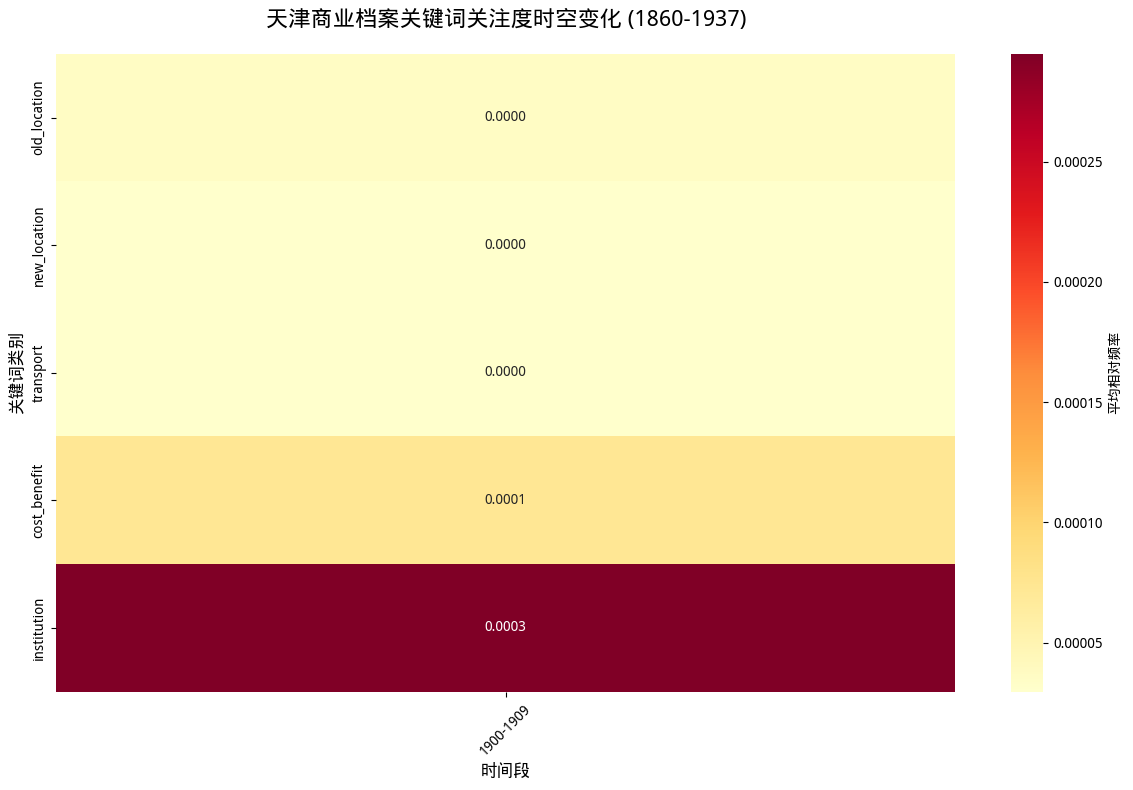

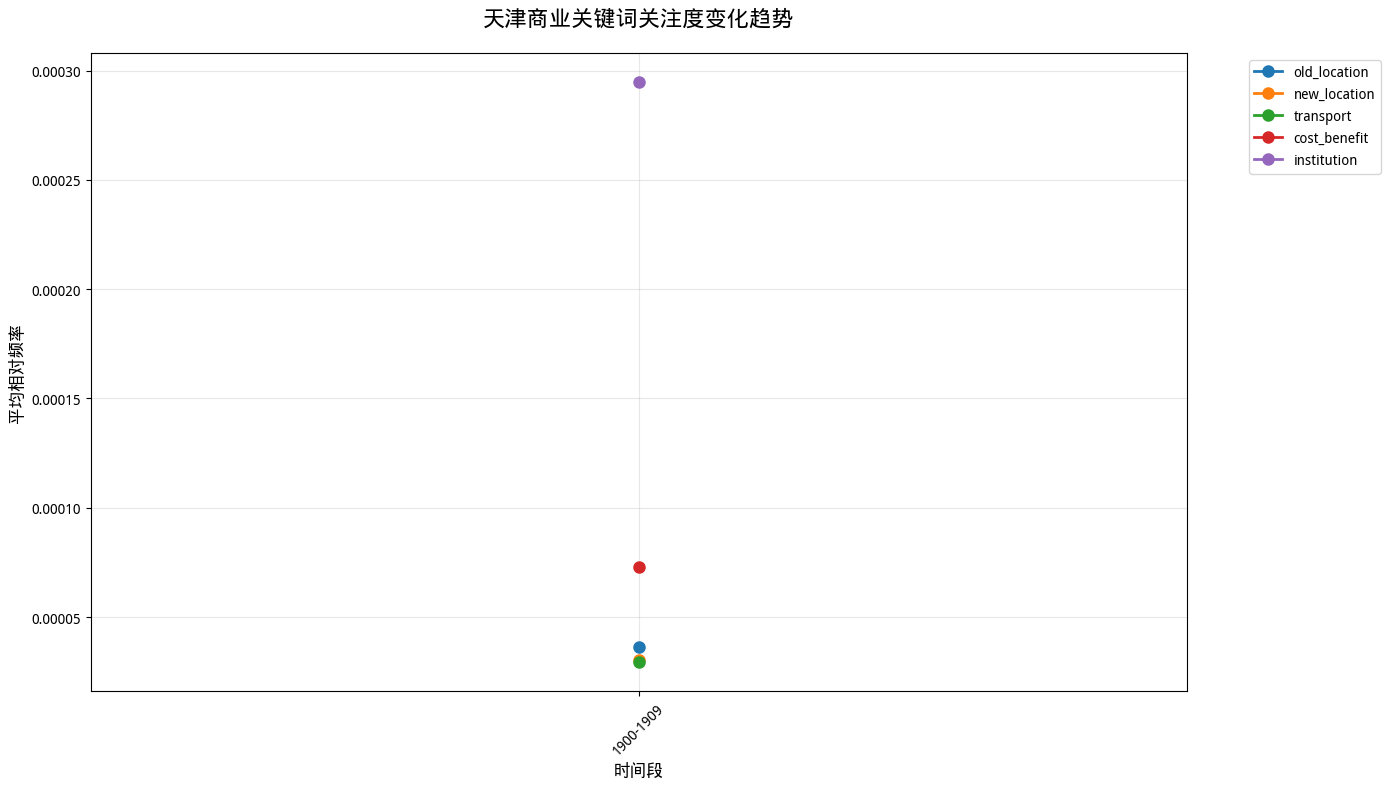


第二层分析：共现网络分析


共提取 15215 个句子

正在构建共现网络...
正在生成共现网络图...


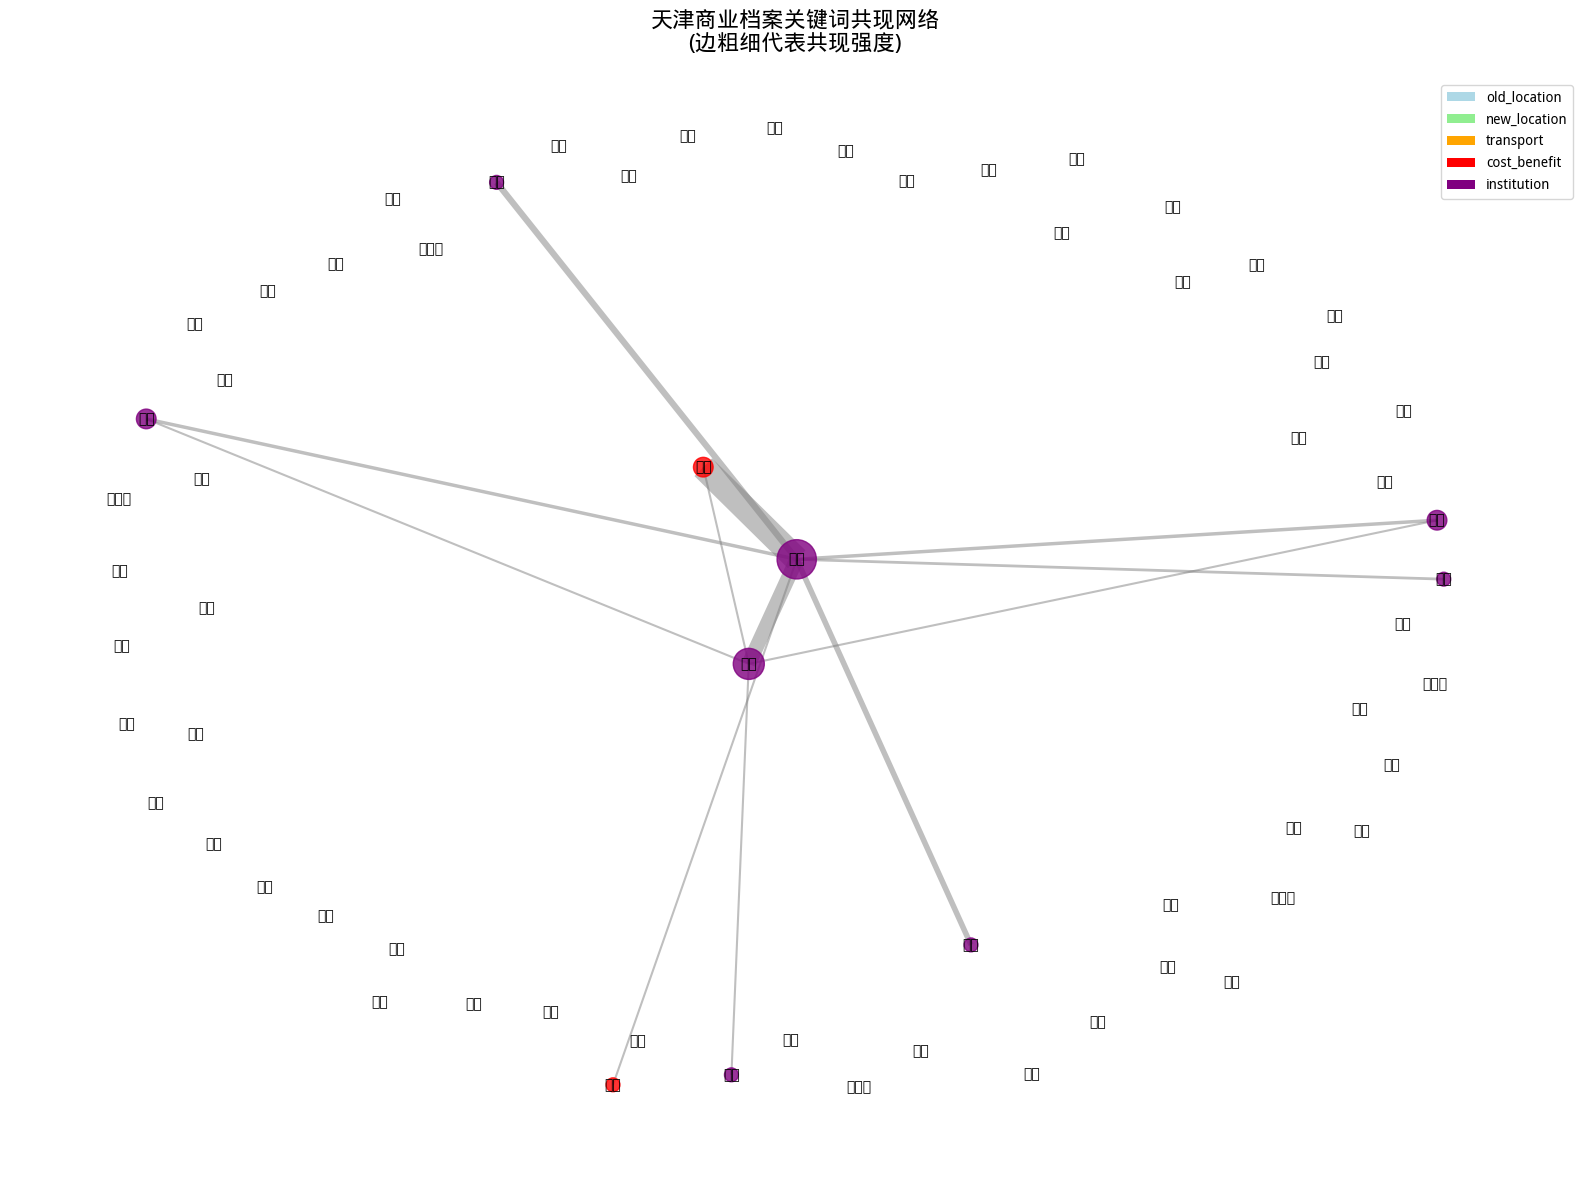


关键连接分析:

1. 新区位词的关键连接:

第三层分析：主题建模

正在进行LDA主题建模...

LDA主题分析结果:

主题 1:
  商务: 1146.9138
  总会: 678.4349
  章程: 503.8617
  天津: 442.5181
  商业: 384.9919
  总理: 367.7593
  办理: 313.1918
  分会: 299.9373
  公所: 252.3994
  协理: 238.4956
  主题类型: 商业规则制定

主题 2:
  光绪: 990.8202
  商会: 414.2081
  三十四年: 246.6086
  三类: 208.5936
  三十三年: 170.8163
  1908: 167.4507
  三十二年: 162.3452
  四月: 131.2575
  开设: 125.0858
  三十一年: 123.7840
  主题类型: 其他商业议题

主题 3:
  市面: 422.6842
  商号: 231.5079
  银元: 217.9148
  不得: 213.9447
  维持: 183.4212
  姓名: 167.8307
  商人: 165.9610
  银行: 160.7463
  入会: 157.1624
  经理: 146.2796
  主题类型: 其他商业议题

主题 4:
  宣统: 674.0459
  三年: 374.1858
  二年: 333.1110
  元年: 281.1593
  1911: 255.6600
  1910: 211.5226
  10: 203.5969
  12: 192.1524
  11: 191.9435
  九月: 162.4915
  主题类型: 其他商业议题

主题 5:
  商会: 1214.9452
  天津: 963.6877
  铜元: 660.4671
  银号: 275.3152
  银行: 243.1259
  办法: 227.2097
  照会: 223.3469
  上海: 219.9494
  公估: 200.0249
  二类: 196.7747
  主题类型: 其他商业议题

主题 6:
  两三: 1087.8135
  钱盘: 746.1359
  七百: 472.9132
  日钱盘: 

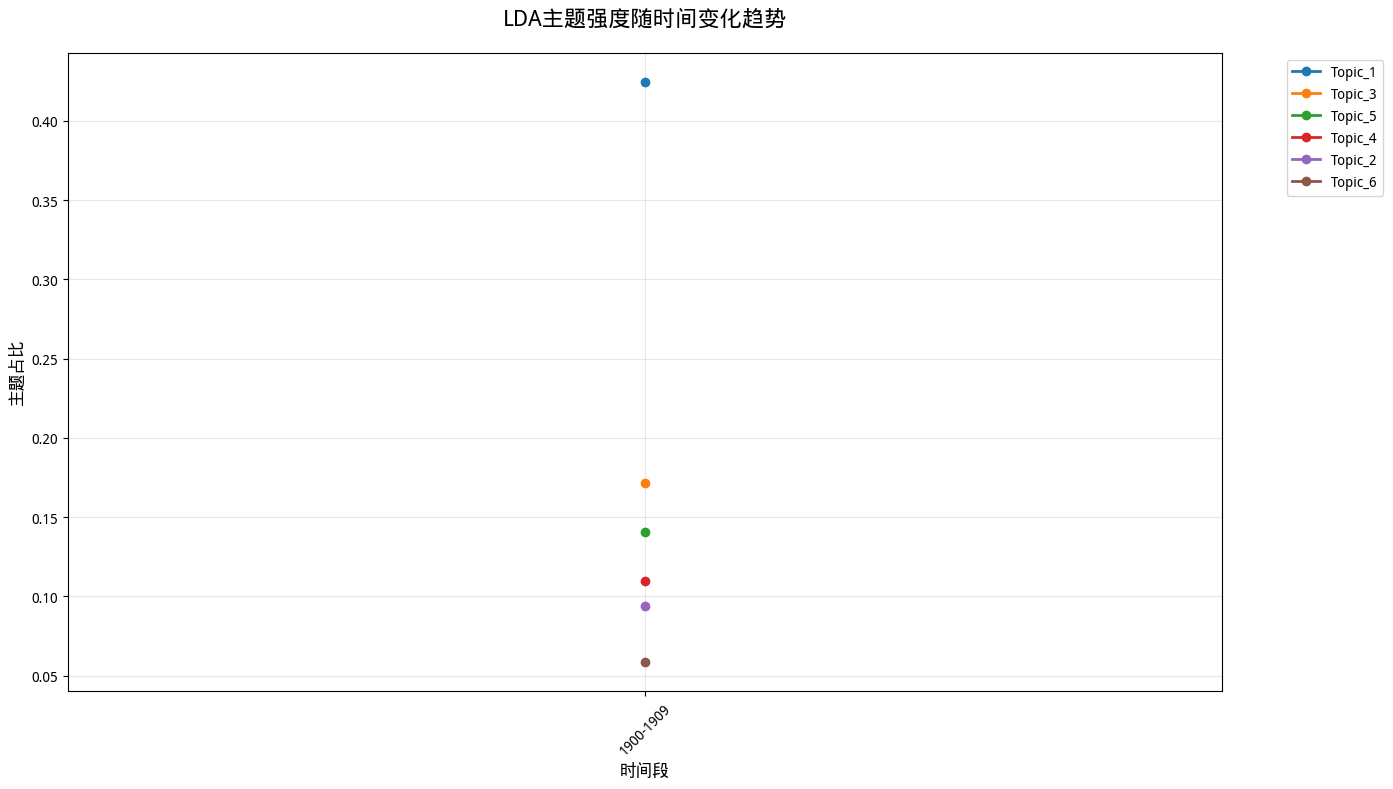


第四层分析：关键语境提取

正在提取关键语境证据...
共提取 9 条关键语境证据
已保存至 key_evidence.txt 和 key_evidence.csv

关键词组合模式分析:

最常见的关键词组合:
  河北 + 禁止: 1 次
  码头 + 收入: 1 次
  租界 + 合同: 1 次
  河北 + 禀请: 1 次
  马路 + 禀请: 1 次
  租界 + 禁止: 1 次
  租界 + 章程: 1 次
  马路 + 章程: 1 次
  马路 + 成本: 1 次


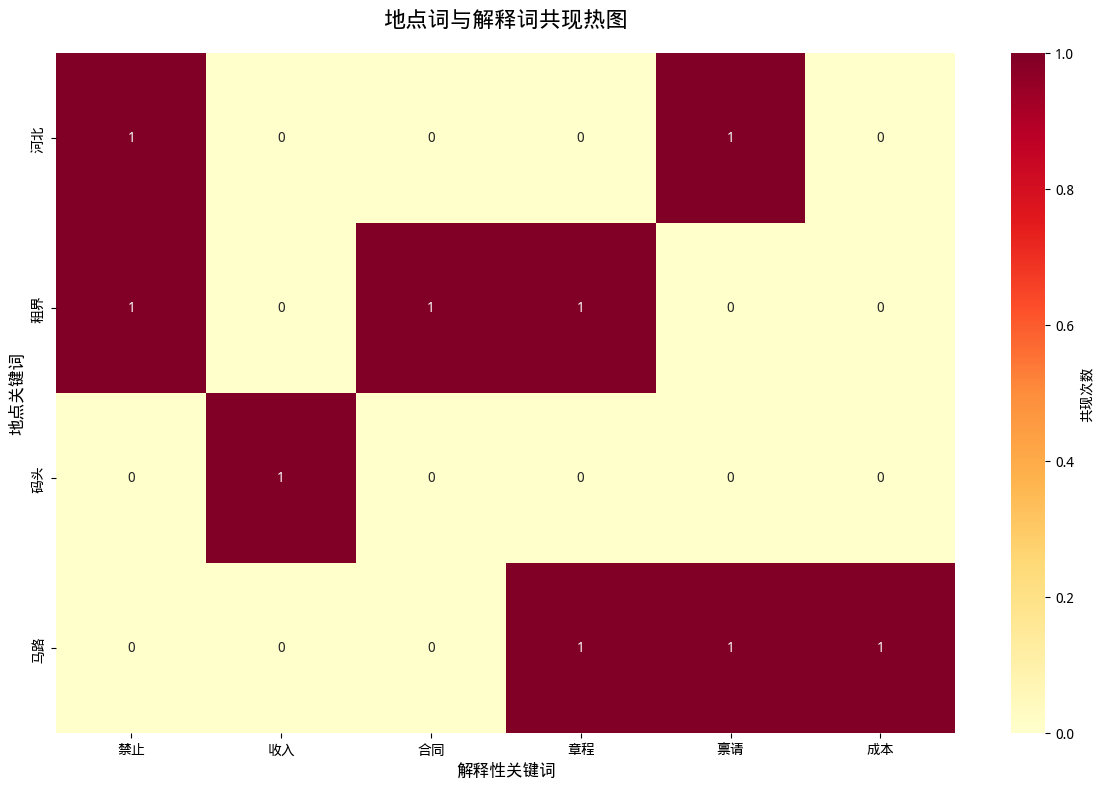


生成分析摘要报告...

分析完成！所有结果已保存至 ./analysis_results/ 目录

输出文件:
1. spatiotemporal_keywords.csv - 关键词时空分布
2. heatmap_keywords.png - 关键词热力图
3. trend_keywords.png - 关键词趋势图
4. cooccurrence_matrix.csv - 共现矩阵
5. cooccurrence_network.png - 共现网络图
6. lda_topics.csv - LDA主题特征词
7. topic_trends.csv - 主题趋势数据
8. topic_trends.png - 主题趋势图
9. key_evidence.txt - 关键语境证据
10. key_evidence.csv - 关键语境数据
11. keyword_combination_heatmap.png - 关键词组合热图
12. analysis_summary.txt - 分析摘要


In [ ]:
# -*- coding: utf-8 -*-
"""
天津商会档案文本分析系统
分析1860-1937年天津商业空间转移
"""

# 1. 安装必要库
!pip install jieba seaborn networkx pyLDAvis -q

# 2. 导入库
import pandas as pd
import numpy as np
import re
import jieba
import jieba.posseg as pseg
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import networkx as nx
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore')


# 3. 数据准备函数
def load_data():
    """
    加载天津商会档案数据
    假设tianjin_shanghui.txt格式：每行包含[年份] 文本内容
    """
    print("正在加载数据...")

    # 创建分析结果目录
    os.makedirs('./analysis_results', exist_ok=True)

    # 读取数据（根据实际格式调整）
    with open('tianjin_chamber_archive.txt', 'r', encoding='gbk') as f:
        lines = f.readlines()

    data = []
    for i, line in enumerate(lines):
        # 提取年份和文本（根据实际格式调整正则表达式）
        year_match = re.search(r'\[(\d{4})\]', line)
        if year_match:
            year = int(year_match.group(1))
            text = re.sub(r'\[\d{4}\]', '', line).strip()
        else:
            # 如果没有年份标记，使用默认值或跳过
            year = 1900
            text = line.strip()

        if text:  # 只添加非空文本
            data.append({
                'doc_id': f'doc_{i:04d}',
                'year': year,
                'text': text,
                'time_slice': f"{year//10*10}-{year//10*10+9}"
            })

    print(f"加载完成，共 {len(data)} 条记录")
    return pd.DataFrame(data)

def load_stopwords():
    """加载停用词表"""
    stopwords = set()
    try:
        with open('stopwords.txt', 'r', encoding='utf-8') as f:
            for line in f:
                stopwords.add(line.strip())
    except FileNotFoundError:
        # 如果没有停用词文件，使用默认停用词
        default_stopwords = {'的', '了', '和', '是', '在', '与', '及', '等', '之', '者',
                            '查', '窃', '为', '有', '于', '而', '以', '但', '则', '亦',
                            '或', '并', '且', '仍', '虽', '因', '故', '此', '其', '已',
                            '未', '又', '也', '皆', '各', '均', '均', '均'}
        stopwords.update(default_stopwords)
        print("使用默认停用词表")

    return stopwords

# 4. 关键词定义
KEYWORDS = {
    'old_location': ["运河", "码头", "河北", "北大关", "城里", "老城", "河沿", "河岸"],
    'new_location': ["车站", "租界", "法界", "英界", "日界", "梨栈", "劝业场",
                     "马路", "新区", "铁道", "铁路站", "租借地"],
    'transport': ["铁路", "火车", "运费", "装卸", "便捷", "运输", "货运",
                  "客运", "通车", "轨道", "火车票"],
    'cost_benefit': ["地价", "租金", "利息", "盈亏", "销路", "客源", "成本",
                    "利润", "收益", "支出", "收入", "便宜", "昂贵", "划算"],
    'institution': ["章程", "规则", "协议", "争端", "禀请", "议决", "官府",
                   "许可", "条例", "规定", "合同", "讼案", "纠纷", "调解",
                   "协商", "议定", "批准", "禁止", "限制"]
}

# 5. 第一层分析：基础词频与时空分布
class SpatioTemporalAnalyzer:
    def __init__(self, df, stopwords):
        self.df = df
        self.stopwords = stopwords
        self.time_slices = sorted(df['time_slice'].unique())

        # 初始化jieba，添加自定义词典
        for category in KEYWORDS.values():
            for word in category:
                jieba.add_word(word)

    def preprocess_text(self, text):
        """文本预处理"""
        # 分词
        words = jieba.lcut(text)
        # 去除停用词和标点
        words_clean = []
        for word in words:
            word = word.strip()
            if (word and
                word not in self.stopwords and
                not re.match(r'^\d+$', word) and  # 去除纯数字
                not re.match(r'^[^一-鿿]+$', word)):  # 去除非中文
                words_clean.append(word)

        return words_clean

    def calculate_keyword_frequencies(self):
        """计算关键词频率"""
        print("\n正在计算关键词时空分布...")

        # 初始化结果矩阵
        keyword_list = []
        for category in KEYWORDS.values():
            keyword_list.extend(category)

        # 创建结果DataFrame
        results = pd.DataFrame(0, index=self.time_slices,
                              columns=keyword_list, dtype=float)
        total_words_by_slice = {}

        # 按时间片处理
        for time_slice in self.time_slices:
            slice_docs = self.df[self.df['time_slice'] == time_slice]
            all_words = []

            # 合并该时间段的所有文本
            for _, row in slice_docs.iterrows():
                words = self.preprocess_text(row['text'])
                all_words.extend(words)

            total_words = len(all_words)
            total_words_by_slice[time_slice] = total_words

            if total_words > 0:
                word_counts = Counter(all_words)
                for keyword in keyword_list:
                    if keyword in word_counts:
                        # 计算相对频率
                        results.loc[time_slice, keyword] = word_counts[keyword] / total_words

        # 保存结果
        results.to_csv('./analysis_results/spatiotemporal_keywords.csv')
        print("关键词时空分布已保存至 spatiotemporal_keywords.csv")

        return results

    def plot_heatmap(self, freq_matrix):
        """绘制热力图"""
        print("\n正在绘制热力图...")

        # 重新组织数据，按类别分组
        categories_data = {}
        for category_name, keywords in KEYWORDS.items():
            # 只取存在的列
            available_keywords = [k for k in keywords if k in freq_matrix.columns]
            if available_keywords:
                categories_data[category_name] = freq_matrix[available_keywords].mean(axis=1)

        # 转换为DataFrame
        heatmap_data = pd.DataFrame(categories_data)

        plt.figure(figsize=(12, 8))
        sns.heatmap(heatmap_data.T, annot=True, fmt='.4f', cmap='YlOrRd',
                   cbar_kws={'label': '平均相对频率'})
        plt.title('天津商业档案关键词关注度时空变化 (1860-1937)', fontsize=16, pad=20)
        plt.xlabel('时间段', fontsize=12)
        plt.ylabel('关键词类别', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('./analysis_results/heatmap_keywords.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 绘制折线图展示趋势
        plt.figure(figsize=(14, 8))
        for category in heatmap_data.columns:
            plt.plot(heatmap_data.index, heatmap_data[category],
                    marker='o', linewidth=2, markersize=8, label=category)

        plt.title('天津商业关键词关注度变化趋势', fontsize=16, pad=20)
        plt.xlabel('时间段', fontsize=12)
        plt.ylabel('平均相对频率', fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('./analysis_results/trend_keywords.png', dpi=300, bbox_inches='tight')
        plt.show()

# 6. 第二层分析：共现网络分析
class CooccurrenceNetworkAnalyzer:
    def __init__(self, df):
        self.df = df
        self.sentences = self.extract_sentences()

    def extract_sentences(self):
        """提取所有句子"""
        all_sentences = []
        for _, row in self.df.iterrows():
            text = row['text']
            # 按中文标点分割句子
            sentences = re.split(r'[。！？；]', text)
            for sent in sentences:
                sent = sent.strip()
                if len(sent) > 5:  # 只保留有意义的句子
                    all_sentences.append({
                        'sentence': sent,
                        'year': row['year'],
                        'doc_id': row['doc_id']
                    })

        print(f"共提取 {len(all_sentences)} 个句子")
        return all_sentences

    def build_cooccurrence_matrix(self):
        """构建共现矩阵"""
        print("\n正在构建共现网络...")

        # 提取所有关键词
        all_keywords = []
        for category_name, keywords in KEYWORDS.items():
            for kw in keywords:
                all_keywords.append((kw, category_name))

        # 初始化共现矩阵
        cooccurrence = pd.DataFrame(0, index=[kw[0] for kw in all_keywords],
                                   columns=[kw[0] for kw in all_keywords])

        # 统计共现
        for sent_info in self.sentences:
            sent = sent_info['sentence']
            # 找出句子中存在的关键词
            present_keywords = []
            for kw, _ in all_keywords:
                if kw in sent:
                    present_keywords.append(kw)

            # 更新共现矩阵
            for i in range(len(present_keywords)):
                for j in range(i+1, len(present_keywords)):
                    kw1 = present_keywords[i]
                    kw2 = present_keywords[j]
                    cooccurrence.loc[kw1, kw2] += 1
                    cooccurrence.loc[kw2, kw1] += 1

        # 保存共现矩阵
        cooccurrence.to_csv('./analysis_results/cooccurrence_matrix.csv')

        return cooccurrence

    def visualize_network(self, cooccurrence_matrix, min_weight=3):
        """可视化共现网络"""
        print("正在生成共现网络图...")

        # 创建图
        G = nx.Graph()

        # 添加节点（按类别着色）
        node_colors = []
        category_colors = {
            'old_location': 'lightblue',
            'new_location': 'lightgreen',
            'transport': 'orange',
            'cost_benefit': 'red',
            'institution': 'purple'
        }

        for (kw, category) in [(kw, cat) for cat in KEYWORDS for kw in KEYWORDS[cat]]:
            if kw in cooccurrence_matrix.index:
                G.add_node(kw, category=category)
                node_colors.append(category_colors.get(category, 'gray'))

        # 添加边
        keywords = list(G.nodes())
        for i in range(len(keywords)):
            for j in range(i+1, len(keywords)):
                kw1 = keywords[i]
                kw2 = keywords[j]
                weight = cooccurrence_matrix.loc[kw1, kw2]
                if weight >= min_weight:
                    G.add_edge(kw1, kw2, weight=weight)

        # 绘制网络图
        plt.figure(figsize=(16, 12))

        # 节点大小基于度中心性
        degrees = dict(G.degree())
        node_sizes = [degrees[n] * 100 for n in G.nodes()]

        # 边宽度基于权重
        edge_weights = [G[u][v]['weight'] * 0.5 for u, v in G.edges()]

        pos = nx.spring_layout(G, k=2, iterations=50)

        nx.draw_networkx_nodes(G, pos, node_size=node_sizes,
                              node_color=node_colors, alpha=0.8)
        nx.draw_networkx_edges(G, pos, width=edge_weights,
                              alpha=0.5, edge_color='gray')
        nx.draw_networkx_labels(G, pos, font_size=10, font_family='SimHei')

        # 添加图例
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=color, label=cat)
                          for cat, color in category_colors.items()]
        plt.legend(handles=legend_elements, loc='upper right')

        plt.title('天津商业档案关键词共现网络\n(边粗细代表共现强度)', fontsize=16, pad=20)
        plt.axis('off')
        plt.tight_layout()
        plt.savefig('./analysis_results/cooccurrence_network.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 分析关键连接
        self.analyze_key_connections(G, cooccurrence_matrix)

    def analyze_key_connections(self, G, cooccurrence_matrix):
        """分析关键连接"""
        print("\n关键连接分析:")

        # 分析新区位词的连接
        print("\n1. 新区位词的关键连接:")
        for location in KEYWORDS['new_location']:
            if location in G.nodes():
                connections = []
                for neighbor in G.neighbors(location):
                    weight = cooccurrence_matrix.loc[location, neighbor]
                    connections.append((neighbor, weight))

                connections.sort(key=lambda x: x[1], reverse=True)
                if connections:
                    print(f"\n{location}:")
                    for neighbor, weight in connections[:5]:
                        category = next((cat for cat, kws in KEYWORDS.items()
                                       if neighbor in kws), '其他')
                        print(f"  - 与 '{neighbor}' ({category}) 共现 {weight} 次")

# 7. 第三层分析：主题建模
class TopicModelingAnalyzer:
    def __init__(self, df, stopwords):
        self.df = df
        self.stopwords = stopwords
        self.vectorizer = None
        self.lda_model = None

    def preprocess_for_lda(self, n_topics=6):
        """为LDA准备数据"""
        print("\n正在进行LDA主题建模...")

        # 准备文档
        documents = []
        for _, row in self.df.iterrows():
            words = jieba.lcut(row['text'])
            words_clean = [w for w in words if w not in self.stopwords and len(w) > 1]
            documents.append(' '.join(words_clean))

        # 创建文档-词矩阵
        self.vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                         max_features=1000)
        dtm = self.vectorizer.fit_transform(documents)

        # 训练LDA模型
        self.lda_model = LatentDirichletAllocation(n_components=n_topics,
                                                  random_state=42,
                                                  learning_method='online',
                                                  max_iter=50)
        lda_output = self.lda_model.fit_transform(dtm)

        # 分析主题
        self.analyze_topics(lda_output)

        return lda_output

    def analyze_topics(self, lda_output):
        """分析并输出主题"""
        print("\nLDA主题分析结果:")

        feature_names = self.vectorizer.get_feature_names_out()

        # 输出每个主题的特征词
        topics_df = pd.DataFrame()
        for topic_idx, topic in enumerate(self.lda_model.components_):
            top_features_ind = topic.argsort()[:-11:-1]
            top_features = [feature_names[i] for i in top_features_ind]
            topic_proportions = topic[top_features_ind]

            print(f"\n主题 {topic_idx + 1}:")
            for feature, proportion in zip(top_features, topic_proportions):
                print(f"  {feature}: {proportion:.4f}")

            # 识别主题类型
            topic_type = self.classify_topic(top_features)
            print(f"  主题类型: {topic_type}")

            # 保存到DataFrame
            topics_df[f'Topic_{topic_idx+1}'] = top_features

        # 保存主题词
        topics_df.to_csv('./analysis_results/lda_topics.csv', index=False)

        # 分析主题随时间变化
        self.analyze_topic_trends(lda_output)

    def classify_topic(self, top_features):
        """根据特征词识别主题类型"""
        feature_str = ' '.join(top_features)

        if any(word in feature_str for word in KEYWORDS['new_location']):
            if any(word in feature_str for word in KEYWORDS['cost_benefit']):
                return "新区位开发与经济计算"
            elif any(word in feature_str for word in KEYWORDS['institution']):
                return "新区位制度调适"

        if any(word in feature_str for word in KEYWORDS['transport']):
            if any(word in feature_str for word in ['成本', '运费', '价格']):
                return "运输成本争议"

        if any(word in feature_str for word in KEYWORDS['institution']):
            return "商业规则制定"

        if any(word in feature_str for word in KEYWORDS['old_location']):
            return "传统商业区议题"

        return "其他商业议题"

    def analyze_topic_trends(self, lda_output):
        """分析主题强度随时间变化"""
        print("\n分析主题强度随时间变化...")

        # 为每个文档分配主要主题
        dominant_topics = lda_output.argmax(axis=1)
        self.df['dominant_topic'] = dominant_topics + 1

        # 按时间段计算主题分布
        time_slices = sorted(self.df['time_slice'].unique())
        topic_trends = pd.DataFrame(index=time_slices)

        for time_slice in time_slices:
            slice_docs = self.df[self.df['time_slice'] == time_slice]
            if len(slice_docs) > 0:
                topic_counts = slice_docs['dominant_topic'].value_counts(normalize=True)
                for topic, prop in topic_counts.items():
                    topic_trends.loc[time_slice, f'Topic_{topic}'] = prop

        # 填充NaN为0
        topic_trends = topic_trends.fillna(0)

        # 绘制主题趋势图
        plt.figure(figsize=(14, 8))
        for topic_col in topic_trends.columns:
            plt.plot(topic_trends.index, topic_trends[topic_col],
                    marker='o', linewidth=2, label=topic_col)

        plt.title('LDA主题强度随时间变化趋势', fontsize=16, pad=20)
        plt.xlabel('时间段', fontsize=12)
        plt.ylabel('主题占比', fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('./analysis_results/topic_trends.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 保存主题趋势数据
        topic_trends.to_csv('./analysis_results/topic_trends.csv')

# 8. 第四层分析：关键语境提取
class KeyContextExtractor:
    def __init__(self, df):
        self.df = df

    def extract_key_contexts(self, max_results=100):
        """提取关键语境"""
        print("\n正在提取关键语境证据...")

        key_evidence = []

        # 合并所有关键词
        location_words = KEYWORDS['old_location'] + KEYWORDS['new_location']
        explanatory_words = KEYWORDS['cost_benefit'] + KEYWORDS['institution']

        for idx, row in self.df.iterrows():
            text = row['text']
            doc_id = row['doc_id']
            year = row['year']

            # 按句子分割
            sentences = re.split(r'[。！？；]', text)

            for sent in sentences:
                sent = sent.strip()
                if len(sent) < 10:  # 跳过太短的句子
                    continue

                # 检查是否包含地点词和解释性词
                has_location = any(word in sent for word in location_words)
                has_explanatory = any(word in sent for word in explanatory_words)

                if has_location and has_explanatory:
                    # 找出具体是哪些关键词
                    found_locations = [w for w in location_words if w in sent]
                    found_explanatory = [w for w in explanatory_words if w in sent]

                    evidence = {
                        'doc_id': doc_id,
                        'year': f'{year}年',
                        'sentence': sent,
                        'location_keywords': ','.join(found_locations),
                        'explanatory_keywords': ','.join(found_explanatory),
                        'time_slice': row['time_slice']
                    }
                    key_evidence.append(evidence)

                    if len(key_evidence) >= max_results:
                        break

            if len(key_evidence) >= max_results:
                break

        # 转换为DataFrame
        evidence_df = pd.DataFrame(key_evidence)

        # 保存到文件
        with open('./analysis_results/key_evidence.txt', 'w', encoding='utf-8') as f:
            f.write("天津商会档案关键语境证据\n")
            f.write("=" * 60 + "\n\n")

            for _, evidence in evidence_df.iterrows():
                f.write(f"[{evidence['doc_id']}, {evidence['year']}]\n")
                f.write(f"地点关键词: {evidence['location_keywords']}\n")
                f.write(f"解释关键词: {evidence['explanatory_keywords']}\n")
                f.write(f"原文: {evidence['sentence']}\n")
                f.write("-" * 60 + "\n\n")

        # 保存为CSV用于进一步分析
        evidence_df.to_csv('./analysis_results/key_evidence.csv', index=False, encoding='utf-8-sig')

        print(f"共提取 {len(key_evidence)} 条关键语境证据")
        print("已保存至 key_evidence.txt 和 key_evidence.csv")

        # 统计关键词组合
        self.analyze_keyword_combinations(evidence_df)

        return evidence_df

    def analyze_keyword_combinations(self, evidence_df):
        """分析关键词组合模式"""
        print("\n关键词组合模式分析:")

        # 统计最常见的组合
        combinations = []
        for _, row in evidence_df.iterrows():
            locations = row['location_keywords'].split(',')
            explanatories = row['explanatory_keywords'].split(',')

            for loc in locations:
                for exp in explanatories:
                    combinations.append((loc.strip(), exp.strip()))

        if combinations:
            combo_counts = Counter(combinations)
            print("\n最常见的关键词组合:")
            for (loc, exp), count in combo_counts.most_common(10):
                print(f"  {loc} + {exp}: {count} 次")

            # 绘制组合热图
            self.plot_combination_heatmap(combo_counts)

    def plot_combination_heatmap(self, combo_counts):
        """绘制关键词组合热图"""
        # 提取所有唯一的关键词
        locations = set()
        explanatories = set()
        for loc, exp in combo_counts.keys():
            locations.add(loc)
            explanatories.add(exp)

        # 创建矩阵
        heatmap_data = pd.DataFrame(0, index=list(locations), columns=list(explanatories))
        for (loc, exp), count in combo_counts.items():
            if loc in heatmap_data.index and exp in heatmap_data.columns:
                heatmap_data.loc[loc, exp] = count

        if not heatmap_data.empty:
            plt.figure(figsize=(12, 8))
            sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd',
                       cbar_kws={'label': '共现次数'})
            plt.title('地点词与解释词共现热图', fontsize=16, pad=20)
            plt.xlabel('解释性关键词', fontsize=12)
            plt.ylabel('地点关键词', fontsize=12)
            plt.tight_layout()
            plt.savefig('./analysis_results/keyword_combination_heatmap.png',
                       dpi=300, bbox_inches='tight')
            plt.show()

# 9. 主执行函数
def main():
    """主执行函数"""
    print("天津商会档案文本分析系统")
    print("=" * 60)

    # 加载数据
    df = load_data()

    # 加载停用词
    stopwords = load_stopwords()

    # 第一层分析：时空分布
    print("\n" + "="*60)
    print("第一层分析：时空分布分析")
    spatial_analyzer = SpatioTemporalAnalyzer(df, stopwords)
    freq_matrix = spatial_analyzer.calculate_keyword_frequencies()
    spatial_analyzer.plot_heatmap(freq_matrix)

    # 第二层分析：共现网络
    print("\n" + "="*60)
    print("第二层分析：共现网络分析")
    network_analyzer = CooccurrenceNetworkAnalyzer(df)
    cooccurrence_matrix = network_analyzer.build_cooccurrence_matrix()
    network_analyzer.visualize_network(cooccurrence_matrix)

    # 第三层分析：主题建模
    print("\n" + "="*60)
    print("第三层分析：主题建模")
    topic_analyzer = TopicModelingAnalyzer(df, stopwords)
    lda_output = topic_analyzer.preprocess_for_lda(n_topics=6)

    # 第四层分析：关键语境提取
    print("\n" + "="*60)
    print("第四层分析：关键语境提取")
    context_extractor = KeyContextExtractor(df)
    key_evidence = context_extractor.extract_key_contexts(max_results=150)

    # 生成分析报告
    generate_summary_report(df, freq_matrix, key_evidence)

    print("\n" + "="*60)
    print("分析完成！所有结果已保存至 ./analysis_results/ 目录")
    print("\n输出文件:")
    print("1. spatiotemporal_keywords.csv - 关键词时空分布")
    print("2. heatmap_keywords.png - 关键词热力图")
    print("3. trend_keywords.png - 关键词趋势图")
    print("4. cooccurrence_matrix.csv - 共现矩阵")
    print("5. cooccurrence_network.png - 共现网络图")
    print("6. lda_topics.csv - LDA主题特征词")
    print("7. topic_trends.csv - 主题趋势数据")
    print("8. topic_trends.png - 主题趋势图")
    print("9. key_evidence.txt - 关键语境证据")
    print("10. key_evidence.csv - 关键语境数据")
    print("11. keyword_combination_heatmap.png - 关键词组合热图")
    print("12. analysis_summary.txt - 分析摘要")

def generate_summary_report(df, freq_matrix, key_evidence):
    """生成分析摘要报告"""
    print("\n生成分析摘要报告...")

    with open('./analysis_results/analysis_summary.txt', 'w', encoding='utf-8') as f:
        f.write("天津商会档案文本分析报告 (1860-1937)\n")
        f.write("=" * 80 + "\n\n")

        f.write("一、数据概况\n")
        f.write("-" * 40 + "\n")
        f.write(f"文档总数: {len(df)} 条\n")
        f.write(f"时间跨度: {df['year'].min()}年 - {df['year'].max()}年\n")
        f.write(f"时间段划分: {', '.join(sorted(df['time_slice'].unique()))}\n\n")

        f.write("二、关键词时空分布特征\n")
        f.write("-" * 40 + "\n")

        # 分析每个关键词类别的峰值时间
        for category_name, keywords in KEYWORDS.items():
            available_keywords = [k for k in keywords if k in freq_matrix.columns]
            if available_keywords:
                category_data = freq_matrix[available_keywords].mean(axis=1)
                peak_time = category_data.idxmax()
                peak_value = category_data.max()

                f.write(f"\n{category_name}:\n")
                f.write(f"  关注度峰值: {peak_time} (相对频率: {peak_value:.6f})\n")
                f.write(f"  总体趋势: {'上升' if category_data.iloc[-1] > category_data.iloc[0] else '波动'}\n")

        f.write("\n\n三、关键发现摘要\n")
        f.write("-" * 40 + "\n")

        # 从关键证据中提取重要发现
        if len(key_evidence) > 0:
            f.write("\n1. 空间转移证据:\n")
            new_loc_evidence = key_evidence[key_evidence['location_keywords'].apply(
                lambda x: any(kw in x for kw in KEYWORDS['new_location'])
            )]
            f.write(f"   发现 {len(new_loc_evidence)} 条关于新区位的讨论\n")

            f.write("\n2. 经济理性证据:\n")
            economic_evidence = key_evidence[key_evidence['explanatory_keywords'].apply(
                lambda x: any(kw in x for kw in KEYWORDS['cost_benefit'])
            )]
            f.write(f"   发现 {len(economic_evidence)} 条涉及经济计算的讨论\n")

            f.write("\n3. 制度调适证据:\n")
            institution_evidence = key_evidence[key_evidence['explanatory_keywords'].apply(
                lambda x: any(kw in x for kw in KEYWORDS['institution'])
            )]
            f.write(f"   发现 {len(institution_evidence)} 条涉及制度规则的讨论\n")

        f.write("\n\n四、研究建议\n")
        f.write("-" * 40 + "\n")
        f.write("1. 重点关注1880-1910年间的关键证据，这是空间转移的关键期\n")
        f.write("2. 深入分析'车站'与'租金'、'章程'的强关联\n")
        f.write("3. 对比'运河'与'铁路'相关讨论的经济理性差异\n")
        f.write("4. 追踪制度词从'禀请'到'协议'的语义变迁\n")

# 10. 运行主程序
if __name__ == "__main__":
    main()